<a href="https://colab.research.google.com/github/Yuvaranii/Customer-Conversion-Prediction/blob/main/Customer_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/Yuvaranii/Customer-Conversion-Prediction/main/Customer%20Conversion%20Prediction%20-%20Customer%20Conversion%20Prediction.csv")

In [3]:
# Viewing the top 5 data
Data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [4]:
# Viewing the bottom 5 data
Data.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [5]:
# Checking the shape of the data to know the number of rows and columns
Data.shape

(45211, 11)

In [6]:
# knowing the details of the numeric data
Data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [7]:
# Getting the basic info of the data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [8]:
Data.isnull().sum()   #Checking if there is any null values

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [9]:
Data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [10]:
Feature = ['age', 'job', 'marital', 'education_qual', 'call_type', 'mon', 'day', 'prev_outcome']

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


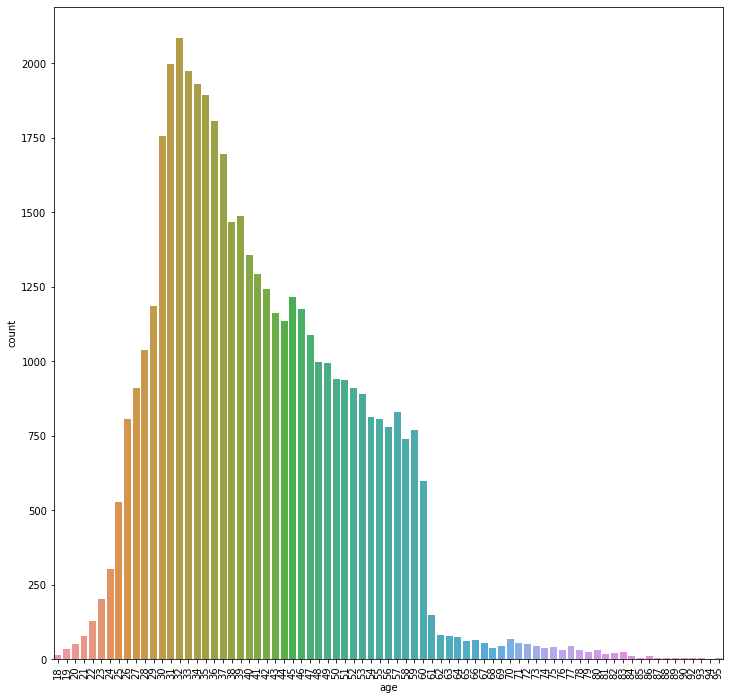

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


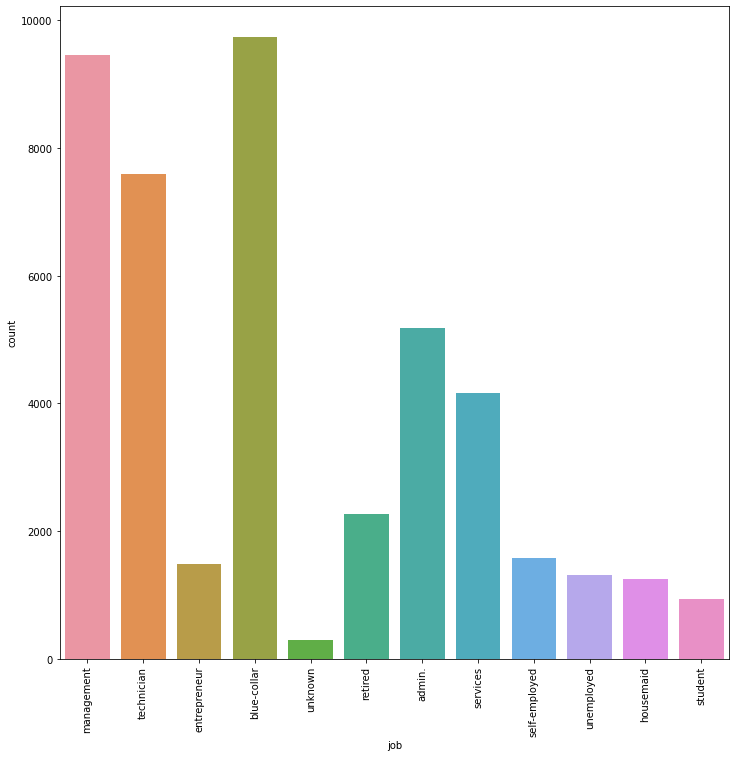

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


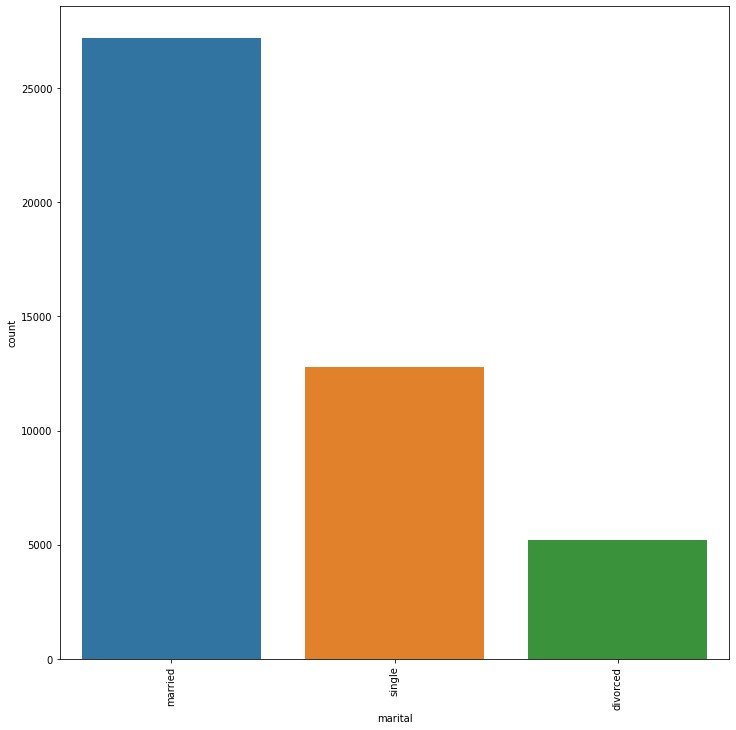

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


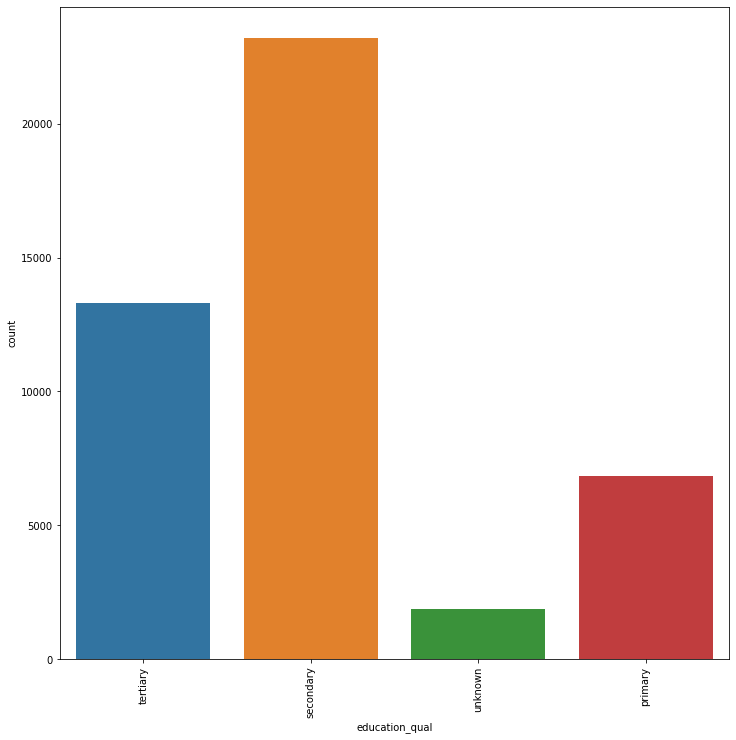

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


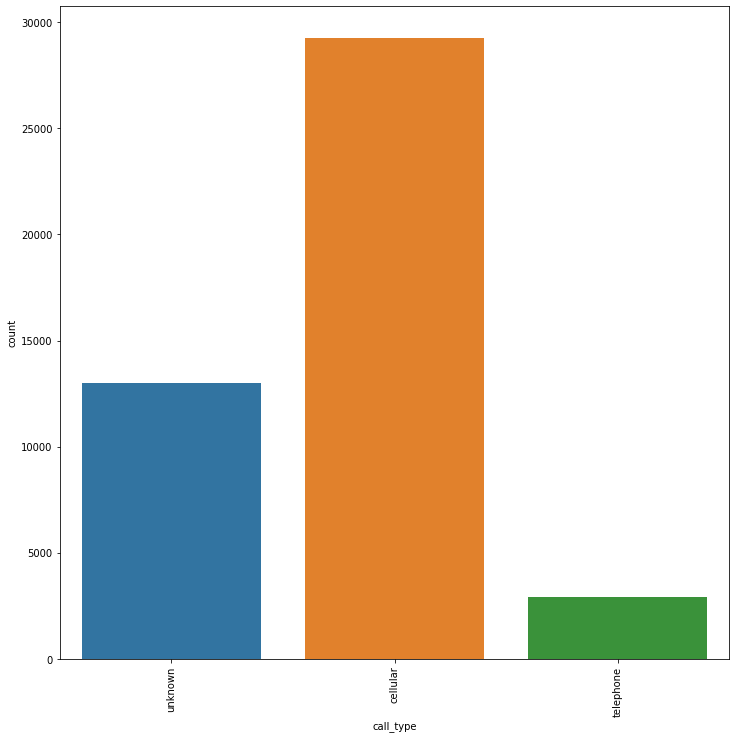

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


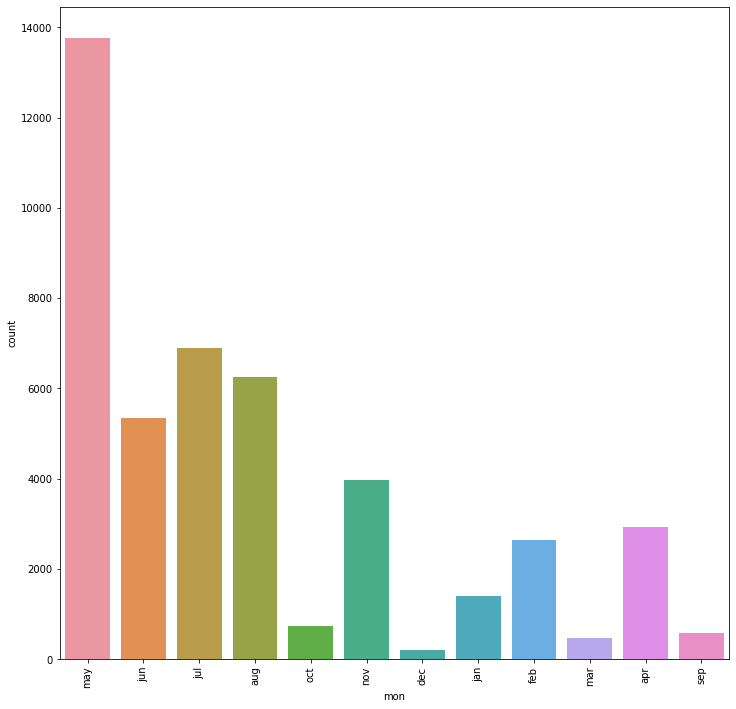

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


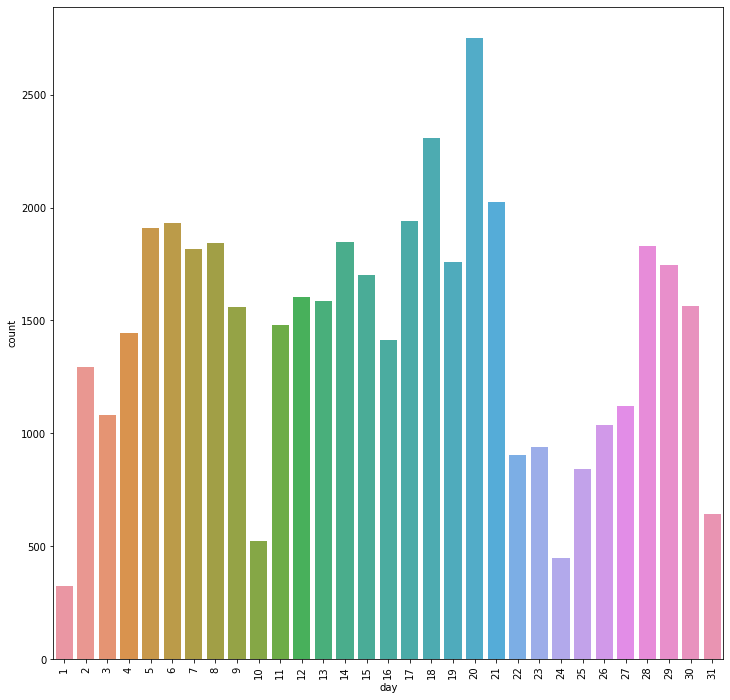

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


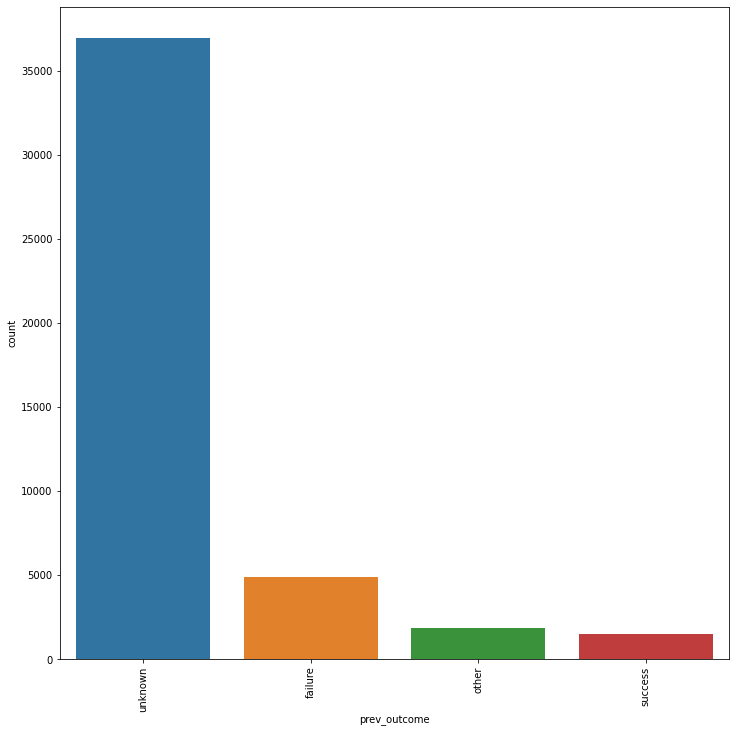

In [11]:
# Visualizing the count plot

for i in Feature:
  plt.figure(figsize=(12, 12))
  sns.countplot(i, data=Data)
  plt.xticks(rotation=90)
  plt.show()

In [12]:
#Converting the Categorical values to Numerical Values - using label encoding method. 

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [13]:
#Getting the unique values and perfoming label encoding

Data.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [14]:
Data["marital"] = label_encoder.fit_transform(Data["marital"])
Data["marital"].unique()

array([1, 2, 0])

In [15]:
Data.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
Data["education_qual"] = label_encoder.fit_transform(Data["education_qual"])
Data["education_qual"].unique()

array([2, 1, 3, 0])

In [17]:
Data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [18]:
Data["job"] = label_encoder.fit_transform(Data["job"])
Data["job"].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [19]:
Data.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [20]:
Data["call_type"] = label_encoder.fit_transform(Data["call_type"])

In [ ]:
Data.call_type.unique()

array([2, 0, 1])

In [21]:
Data.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [22]:
Data["mon"] = label_encoder.fit_transform(Data["mon"])

In [23]:
Data.mon.unique()

array([ 8,  6,  5,  1, 10,  9,  2,  4,  3,  7,  0, 11])

In [24]:
Data.drop("prev_outcome",  axis = 1, inplace = True)  # dropping the unnecessary columns which doesnt provide any impact to the model

In [25]:
Data["y"].unique()

array(['no', 'yes'], dtype=object)

In [26]:
Data["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:ylabel='y'>

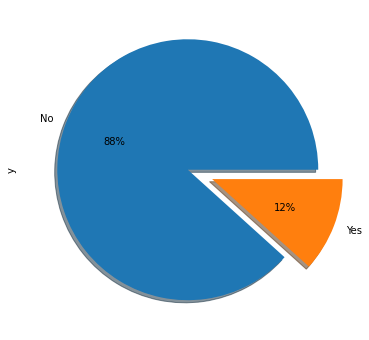

In [27]:
plt.figure(figsize=(9,6))
labels = ['No','Yes']
Data['y'].value_counts().plot.pie(shadow=True,
                                labels=labels,
                                autopct='%0.f%%',
                                explode = [0.0,0.2])

In [28]:
Data['y'] = Data['y'].map({'no': 0, 'yes': 1})

##No values are more than Yes values so we need to balance the data using Over Sampling

In [30]:
Data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,y
0,58,4,1,2,2,5,8,261,1,0
1,44,9,2,1,2,5,8,151,1,0
2,33,2,1,1,2,5,8,76,1,0
3,47,1,1,3,2,5,8,92,1,0
4,33,11,2,3,2,5,8,198,1,0


In [31]:
#Splitting the data to features (X) and Target (Y)
X = Data.drop("y", axis = 1)
Y = Data["y"]

In [32]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
X,Y = ROS.fit_resample(X,Y)

In [33]:
#Doing Train_Test_Split 
X_Train, X_Test, Y_Train, Y_Test =  train_test_split(X,Y, test_size = 0.2, random_state = 42) 

In [34]:
#implementing Standar Scaler to Standardize the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)

#Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [53]:
Result = model.fit (X_Train, Y_Train)

In [54]:
from sklearn.metrics import confusion_matrix
Y_Pred = Result.predict(X_Test)
CM = confusion_matrix(Y_Test, Y_Pred)
CM

array([[6177, 1731],
       [2061, 6000]])

Text(33.0, 0.5, 'Truth')

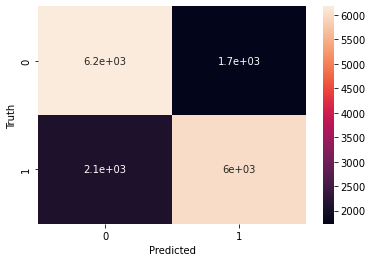

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [56]:
Result.score(X_Test, Y_Test)

0.7625399210971257

In [40]:
Result.predict([[51,	9,	1,	2,	0,	9, 9,	977,	3]])

array([1])

#KNN Model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
Result_Knn = knn.fit(X_Train, Y_Train)

In [42]:
from sklearn.metrics import confusion_matrix
Y_pred_Knn = Result_Knn.predict(X_Test)
CM = confusion_matrix(Y_Test, Y_pred_Knn)
CM

array([[6617, 1291],
       [ 151, 7910]])

Text(33.0, 0.5, 'Truth')

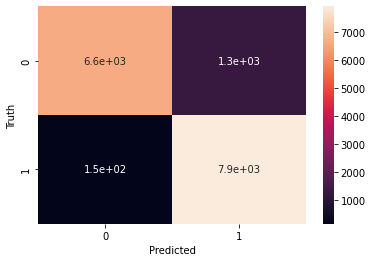

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [44]:
Result_Knn.score(X_Test, Y_Test)

0.9097000438349302

#Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200, random_state=42)
Result_random = RF.fit(X_Train, Y_Train)

In [49]:
from sklearn.metrics import confusion_matrix
Y_pred = Result_random.predict(X_Test)
CM = confusion_matrix(Y_Test, Y_pred)
CM

array([[7377,  531],
       [   3, 8058]])

Text(33.0, 0.5, 'Truth')

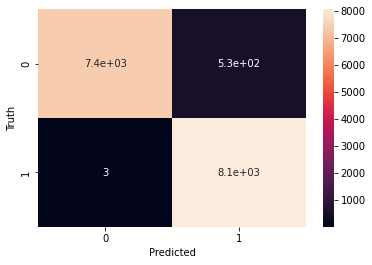

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.heatmap(CM, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [51]:
Result_random.score(X_Test, Y_Test)

0.9665602104076648

#AUC-ROC
ROC curve (receiver operating characteristic curve)
This curve plots two parameters:

--->True Positive Rate (TPR) TPR = TP/(TP+FN)


--->False Positive Rate (FPR) FPR = FP/(FP+TN)


TP - True Positive; TN - True Negative; FP - False Positive; FN - False Negative


An ROC curve plots TPR vs. FPR

AUC: Area Under the ROC Curve


AUC provides an aggregate measure of performance across all possible classification thresholds.


AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

In [57]:
from sklearn.metrics import roc_curve

In [ ]:
Result = model.fit (X_Train, Y_Train)
Result_Knn = knn.fit(X_Train, Y_Train)
Result_random = RF.fit(X_Train, Y_Train)

In [58]:
pred_prob1 = Result.predict_proba(X_Test)
pred_prob2 = Result_Knn.predict_proba(X_Test)
pred_prob3 = Result_random.predict_proba(X_Test)

In [59]:
#ROC curve for classifiers
fpr1, tpr1, thresh1 = roc_curve(Y_Test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_Test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_Test, pred_prob3[:,1], pos_label=1)

In [60]:
#ROC curve for TPR=FPR
random_probs = [0 for i in range(len(Y_Test))]
p_fpr, p_tpr, _ = roc_curve(Y_Test, random_probs, pos_label=1)

In [61]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(Y_Test, pred_prob1[:,1])
auc_score2 = roc_auc_score(Y_Test, pred_prob2[:,1])
auc_score3 = roc_auc_score(Y_Test, pred_prob3[:,1])
 
print("Logistic Regression Score:", auc_score1) 
print("KNN AUC Score:", auc_score2) 
print("Random Forest AUC Score:", auc_score3) 

Logistic Regression Score: 0.8453988326366036
KNN AUC Score: 0.9572395458704264
Random Forest AUC Score: 0.9996571021404381


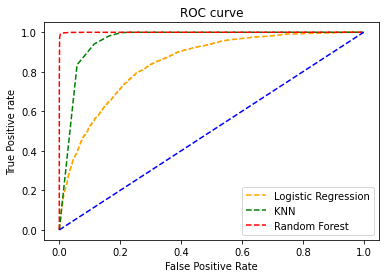

In [62]:
#Plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
#title
plt.title('ROC curve')
#x-label
plt.xlabel('False Positive Rate')
#y-label
plt.ylabel('True Positive rate')
 
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

From the above graph, Random Forest Classifier is the best suited... 